# Homework 2: Predicting the COVID-19 Peak
In this homework, we are going to use regression to learn the infection curve of the COVID-19 in the US, and help answer the following questions

1. When the US will reach the peak of COVID-19 cases?
2. How many people are estimated to be infected in the US?
3. Have we passed the inflection point？

Add your code to the following sections in the template.
```python

    ## add your code here
    
    ##
```

### Student information
    1. Your name: Samarth Subramanya
    2. Department: Computer Science
    3. Graduate 

### TA grading: XX/100
    1. 1?/10
    2. 2?/30
    3. 3: ?/10
    4. 4: ?/30
    5. 5: ?/20

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from datetime import datetime,timedelta

In [2]:
# load data from JHU CSSE 
# https://github.com/CSSEGISandData/COVID-19
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed=pd.read_csv(url_confirmed, index_col=[0,1,2,3])
df_confirmed
#display(df_confirmed.head(5))
#display(df_confirmed.describe())

1/22/20  \
Province/State                   Country/Region         Lat        Long                   
NaN                              Afghanistan             33.000000  65.000000         0   
                                 Albania                 41.153300  20.168300         0   
                                 Algeria                 28.033900  1.659600          0   
                                 Andorra                 42.506300  1.521800          0   
                                 Angola                 -11.202700  17.873900         0   
                                 Antigua and Barbuda     17.060800 -61.796400         0   
                                 Argentina              -38.416100 -63.616700         0   
                                 Armenia                 40.069100  45.038200         0   
Australian Capital Territory     Australia              -35.473500  149.012400        0   
New South Wales                  Australia              -33.868800  151.209300        0   
Northern Territory               Australia              -12.463400  130.845600        0   
Queensland                       Australia              -28.016700  153.400000        0   
South Australia                  Australia              -34.928500  138.600700        0   
Tasmania                         Australia              -41.454500  145.970700        0   
Victoria                         Australia              -37.813600  144.963100        0   
Western Australia                Australia              -31.950500  115.860500        0   
NaN                              Austria                 47.516200  14.550100         0   
                                 Azerbaijan              40.143100  47.576900         0   
                                 Bahamas                 25.034300 -77.396300         0   
                                 Bahrain                 26.027500  50.550000         0   
                                 Bangladesh              23.685000  90.356300         0   
                                 Barbados                13.193900 -59.543200         0   
                                 Belarus                 53.709800  27.953400         0   
                                 Belgium                 50.833300  4.000000          0   
                                 Benin                   9.307700   2.315800          0   
                                 Bhutan                  27.514200  90.433600         0   
                                 Bolivia                -16.290200 -63.588700         0   
                                 Bosnia and Herzegovina  43.915900  17.679100         0   
                                 Brazil                 -14.235000 -51.925300         0   
                                 Brunei                  4.535300   114.727700        0   
...                                                                                 ...   
                                 Mozambique             -18.665695  35.529562         0   
                                 Syria                   34.802075  38.996815         0   
                                 Timor-Leste            -8.874217   125.727539        0   
                                 Belize                  13.193900 -59.543200         0   
Recovered                        Canada                  0.000000   0.000000          0   
NaN                              Laos                    19.856270  102.495496        0   
                                 Libya                   26.335100  17.228331         0   
                                 West Bank and Gaza      31.952200  35.233200         0   
                                 Guinea-Bissau           11.803700 -15.180400         0   
                                 Mali                    17.570692 -3.996166          0   
                                 Saint Kitts and Nevis   17.357822 -62.782998         0   
Northwest Territories            Canada                  64.825500 -124.8457

In [3]:
conf = df_confirmed.keys()

In [4]:
confirmed = df_confirmed.loc[:, conf[4]:conf[-1]]

In [5]:
# show the date range
dates= [datetime.strptime(d, '%m/%d/%y') for d in df_confirmed.columns.values]
date_range = pd.DatetimeIndex(dates)
date_range

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

In [6]:
#dates= [datetime.strptime(d, '%m/%d/%y') for d in df_confirmed.columns.values]
#date_range = pd.DatetimeIndex(dates)
#date_range.day

In [7]:
#confirmed = df_confirmed.loc[:, date_range[4]:date_range[-1]]

In [8]:
# Select data from a list of countries
# Using at least 100 cases to define the outbreak of COVID-19 in a country

all_countries = np.unique(df_confirmed.index.get_level_values('Country/Region').values)
min_cases = 100 # Using at least 100 cases to define the outbreak of COVID-19 in a country

cases = {}
confirmed_selected = {}
for country in all_countries:
    cou = df_confirmed.loc[pd.IndexSlice[:, country], :].sum()
    cases[country] = cou[cou > min_cases] 
    dates = [datetime.strptime(date, '%m/%d/%y') for date in cases[country].index]
    confirmed_selected[country] = pd.DataFrame(cases[country], columns=['Cases'], index=dates)
    confirmed_selected[country]['DayCount'] = np.arange(1,cases[country].shape[0]+1)
    print(country)
    if len(cases[country]) > 0:
        print(' Outbreak:', confirmed_selected[country].index[0], 'Current cases: ',\
              confirmed_selected[country]['Cases'][-1])

Afghanistan
 Outbreak: 2020-03-27 00:00:00 Current cases:  1026
Albania
 Outbreak: 2020-03-23 00:00:00 Current cases:  584
Algeria
 Outbreak: 2020-03-21 00:00:00 Current cases:  2718
Andorra
 Outbreak: 2020-03-22 00:00:00 Current cases:  717
Angola
Antigua and Barbuda
Argentina
 Outbreak: 2020-03-20 00:00:00 Current cases:  2941
Armenia
 Outbreak: 2020-03-19 00:00:00 Current cases:  1339
Australia
 Outbreak: 2020-03-10 00:00:00 Current cases:  6547
Austria
 Outbreak: 2020-03-08 00:00:00 Current cases:  14795
Azerbaijan
 Outbreak: 2020-03-26 00:00:00 Current cases:  1436
Bahamas
Bahrain
 Outbreak: 2020-03-10 00:00:00 Current cases:  1907
Bangladesh
 Outbreak: 2020-04-06 00:00:00 Current cases:  2948
Barbados
Belarus
 Outbreak: 2020-03-30 00:00:00 Current cases:  6264
Belgium
 Outbreak: 2020-03-06 00:00:00 Current cases:  39983
Belize
Benin
Bhutan
Bolivia
 Outbreak: 2020-03-31 00:00:00 Current cases:  564
Bosnia and Herzegovina
 Outbreak: 2020-03-22 00:00:00 Current cases:  1309
Botswana

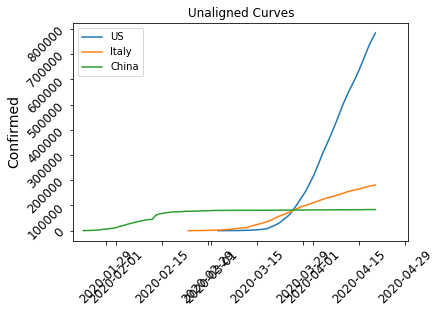

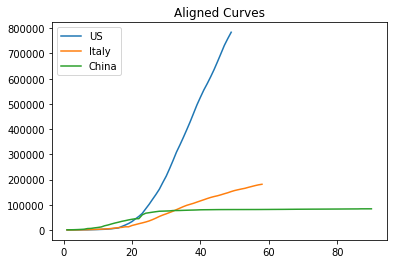

In [9]:
#1. plot the infection curves. 10 points

# plot the raw records of ['US', 'Italy','China'] with un-aligned date
countries = ['US', 'Italy','China']
for country in countries:
    dates=confirmed_selected[country].index
    plt.plot(dates, np.array(list(confirmed_selected[country]['Cases'].values)), label=country)
    plt.legend(loc='upper left')
    plt.tick_params(rotation=45, labelsize=12)
    plt.ylabel('Confirmed', fontsize=14)
plt.xlim([dates[0]-np.timedelta64(3,'D'), dates[-1]+np.timedelta64(10,'D')])
#plt.ylim([1,85])
plt.title('Unaligned Curves')
plt.show()

# plot the records of ['US', 'Italy','China'] with aligned outbreak date (from day 1 to current day)
## add your code here. 10 points
countries = ['US', 'Italy','China']
for country in countries:
    dates=confirmed_selected[country].index
    plt.plot(np.array(list(confirmed_selected[country]['DayCount'].values)), np.array(list(confirmed_selected[country]['Cases'].values)), label=country)
    plt.legend(loc='upper left')
plt.title('Aligned Curves')
plt.show()

##

(-1000, 150000)

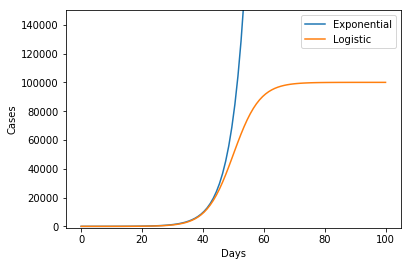

In [10]:
#2. implement the logistic and exponential models. 30 points

# 2.1 complete the logistic function. 10 points
def logistic_model(x,a,b,n):
    
    '''the logistic model
    
        parameters
        ----------
        x: input day
        a: 1/growth rate
        b: inflection point
        n: possible max cases
        
        return
        log_model
    '''
    ## add your code here
    log_model = n / (1 + np.exp(-(1/a)*(x-b)))
    return log_model
    ##
    
#2.2 complete the exponential function. 10 points
def exp_model(x,p,N0=3,X0=1):
    #X0 =1 : N0
    #X = 2 :N0*(1 + p)^(X-X0)
    #X = 3: N0*(1 + p)^(X-X0)
    '''the logistic model

        parameters
        ----------
        x: input day
        p: growth rate
        N0: initial case for day 1
        X0: starting day
        
        return
            exp_model
    '''
    ## add your code here
    exp_model = N0*((1 + p)**(x - X0))
    return exp_model
    ##

# 2.3 plot the the logistic and exponential functions with growth rate 0.23. 10 points
# logistic_model(x, 1/0.23, 50, 100000)
# exp_model(x, 0.23)

x= np.linspace(0,100,100) #input of the horizontal axis X (Days)
## add your code here
x1 = logistic_model(x, 1/0.23, 50, 100000)
y = exp_model(x, 0.23)
##
plt.plot(x, y, label='Exponential')
plt.plot(x, x1, label='Logistic')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Cases')
plt.ylim(-1000,150000)

In [11]:
# select US data and prepare the traing and test dataset
# US confirmed cases from the outbreak date
country = 'US'
print(confirmed_selected[country])

# training and test data
leaveout = -3 # leave out 5 days for test 
x_train = np.array(list(confirmed_selected[country]['DayCount'].values))[:leaveout]
y_train = np.array(list(confirmed_selected[country]['Cases'].values))[:leaveout]    

x_test = np.array(list(confirmed_selected[country]['DayCount'].values))[leaveout:]
y_test = np.array(list(confirmed_selected[country]['Cases'].values))[leaveout:]

             Cases  DayCount
2020-03-03     118         1
2020-03-04     149         2
2020-03-05     217         3
2020-03-06     262         4
2020-03-07     402         5
2020-03-08     518         6
2020-03-09     583         7
2020-03-10     959         8
2020-03-11    1281         9
2020-03-12    1663        10
2020-03-13    2179        11
2020-03-14    2727        12
2020-03-15    3499        13
2020-03-16    4632        14
2020-03-17    6421        15
2020-03-18    7783        16
2020-03-19   13747        17
2020-03-20   19273        18
2020-03-21   25600        19
2020-03-22   33276        20
2020-03-23   43843        21
2020-03-24   53736        22
2020-03-25   65778        23
2020-03-26   83836        24
2020-03-27  101657        25
2020-03-28  121465        26
2020-03-29  140909        27
2020-03-30  161831        28
2020-03-31  188172        29
2020-04-01  213372        30
2020-04-02  243762        31
2020-04-03  275586        32
2020-04-04  308853        33
2020-04-05  33

In [12]:
#3. train the logistic model curve_fit in scipy.optimize and print out the parameters (a, b, n). 10 points
from scipy.optimize import curve_fit

print('Train the logistic model')
## add your code here
popt, pcov = curve_fit(logistic_model, x_train, y_train, bounds=([0,0,0],np.inf), maxfev=1000)
a, b, n = popt

print('a:',a)
print('Inflection Point:',b)
print('Maximum Cases:',n)
##

Train the logistic model
a: 5.557809999085488
Inflection Point: 35.721160692851335
Maximum Cases: 782518.7390423085


In [21]:
# 4. prediction and evaulation. 30 points
import sklearn.metrics as sklm

# 4.1 complete the following evaluate function to calculate the mean squared log error, 
# mean squared error and the R^2. 10 points
def my_evaluation(y, y_pred):
    ## add your code here

    mse = sklm.mean_squared_error(y, y_pred)
    mse_log = np.sqrt(sklm.mean_squared_log_error(y, y_pred))
    r2 = sklm.r2_score(y, y_pred)
    #mse_log = sklm.log_loss(y_true, y_pred, eps = 1e-15, 
    #normalize = True, sample_weight = None, labels = None) 
    ##
    return mse , mse_log, r2

# 4.2 calculate and print out the mse, mse_log and r2 for both the training and test sets. 20 points
## add your code here
pred_cases = logistic_model(x_train, a, b, n)
#print(pred_cases)
mse, mse_log, r2 = my_evaluation(y_train, pred_cases)
#print(mse, mse_log, r2)
print('Training:\nmse = {}\nm_log = {}\nr2 = {}'.format(mse, mse_log, r2))
##

pred_cases_test = logistic_model(x_test, a, b, n)
mse1, mse_log1, r21 = my_evaluation(y_test, pred_cases_test)
print('\n\nTest:\nmse = {}\nm_log = {}\nr2 = {}'.format(mse1, mse_log1, r21))

Training:
mse = 69803592.58901289
m_log = 1.0757670802971118
r2 = 0.99864274846056


Test:
mse = 3040136931.084248
m_log = 0.07482748006593938
r2 = -5.710282017491994


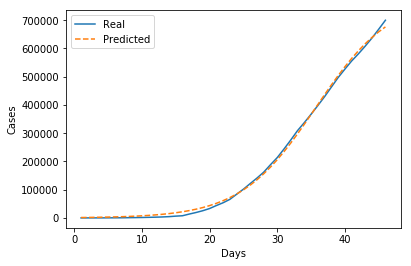

Total Cases= 782518.7390423085
Estimated days = 35.721160692851335 days


In [37]:
# 5. Results visualization. 20 ponts
# 5.1. plot the real infection curve vs. the predicted infection curve
# 5.2. print out the estimated total number of COVID-19 cases that will be confirmed and 
# print out the date that we will reach the end (max number) 

# 5.1 curves. 10 points
## add your code here
plt.plot(x_train, y_train, label ='Real')
plt.plot(x_train, pred_cases, label='Predicted', linestyle='--')
plt.xlabel('Days', size=10)
plt.ylabel('Cases', size=10)
plt.legend(loc='upper left') 
plt.show()
##

# 5.2 estimated total number and when. 10 points
## add your code here
# for i in confirmed_selected:
#     cases = latest_data[latest_data['Country/Region']==i]['Confirmed'].sum()
#     if cases > pred_cases:
#         province_confirmed_cases.append(cases)
#     else:
#         no_cases.append(i)
print('Total Cases= {}\nEstimated days = {} days'.format(n, b))



No handles with labels found to put in legend.


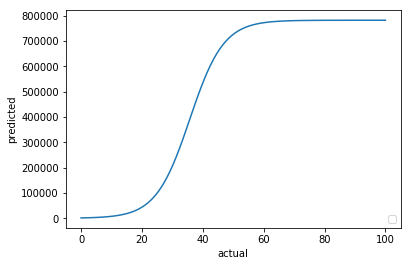

In [19]:
x= np.linspace(0,100,100)
pred_cases2 = logistic_model(x, a, b, n)

plt.plot(x, pred_cases2)
plt.xlabel('actual', size=10)
plt.ylabel('predicted', size=10)
plt.legend(loc='lower right') 
plt.show()
